--- Model Training Started ---
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0695 - loss: 1.0934 - val_accuracy: 0.0000e+00 - val_loss: 0.8480
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0422 - loss: 0.8205 - val_accuracy: 0.5500 - val_loss: 0.6768
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5558 - loss: 0.6744 - val_accuracy: 0.7500 - val_loss: 0.5731
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7164 - loss: 0.5816 - val_accuracy: 0.7500 - val_loss: 0.5116
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7484 - loss: 0.5103 - val_accuracy: 0.7500 - val_loss: 0.4705
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7295 - loss: 0.4808 - val_accuracy: 0.7500 - val_loss: 0.4451
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7451 - loss: 0.4516 - val_accuracy: 0.7500 - val_loss: 0.4270
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7306 - loss: 0.4414 - val_accuracy: 0.7500 - val_loss: 0.4123


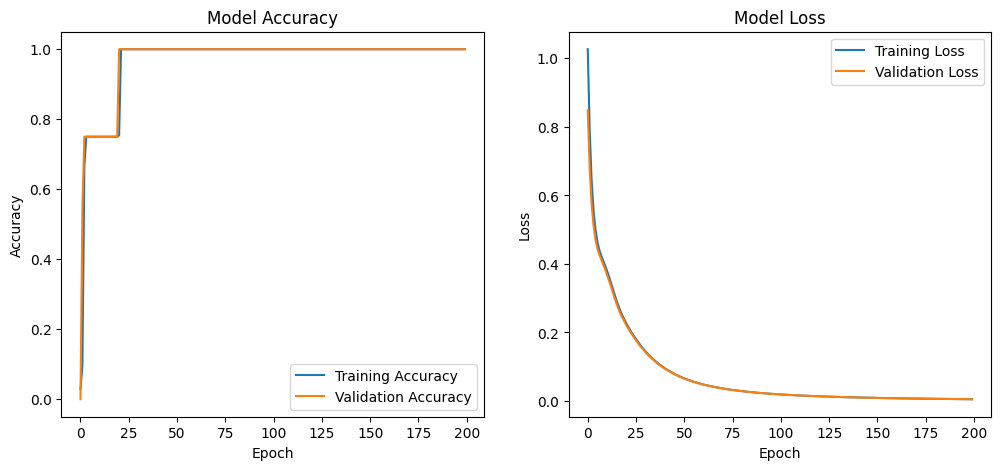

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

num_repeats = 75

np.random.seed(42)

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
] * num_repeats)

y = np.array([
    0, 1, 1, 1
] * num_repeats)

p = np.random.permutation(len(X))
X, y = X[p], y[p]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


print("--- Model Training Started ---")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=1)


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n--- Final Model Performance ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%\n")


table_header = f"{'Facial Scan OK?':<18} | {'Password OK?':<15} | {'Actual Action':<15} | {'Predicted Action':<15}"
table_separator = "-" * 75
table_rows = [table_header, table_separator]

for i in range(15):
    sample_X = X_test[i]
    actual_y = y_test[i]

    prediction_prob = model.predict(np.array([sample_X]), verbose=0)[0][0]
    prediction_label = 1 if prediction_prob > 0.5 else 0

    actual_text = "Door Opens" if actual_y == 1 else "Door Locked"
    predicted_text = "Door Opens" if prediction_label == 1 else "Door Locked"

    row = f"{str(bool(int(sample_X[0]))):<18} | {str(bool(int(sample_X[1]))):<15} | {actual_text:<15} | {predicted_text:<15}"
    table_rows.append(row)

print("--- Sample Predictions ---")
print("\n".join(table_rows))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()